In [4]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [7]:
# Step 2: Load the Dataset (you already uploaded manually)
df = pd.read_csv("/content/mall customer.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Step 3: Basic Info and Null Check
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
df.describe()


Shape: (200, 5)

Missing values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


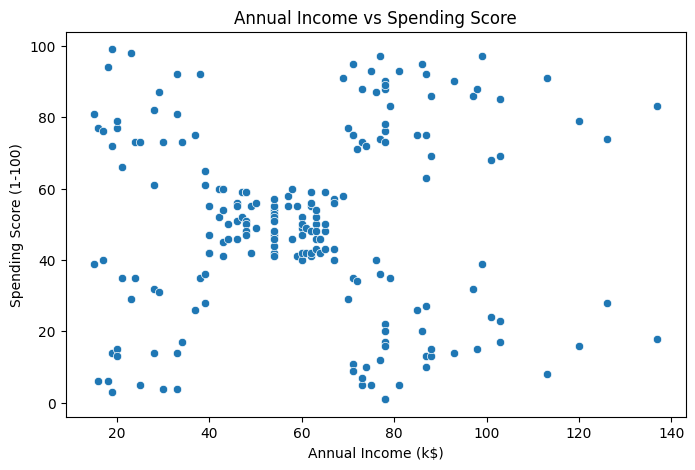

In [9]:
# Step 4: Data Visualization (Annual Income vs Spending Score)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title("Annual Income vs Spending Score")
plt.show()


In [10]:
# Step 5: Feature Selection and Scaling
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


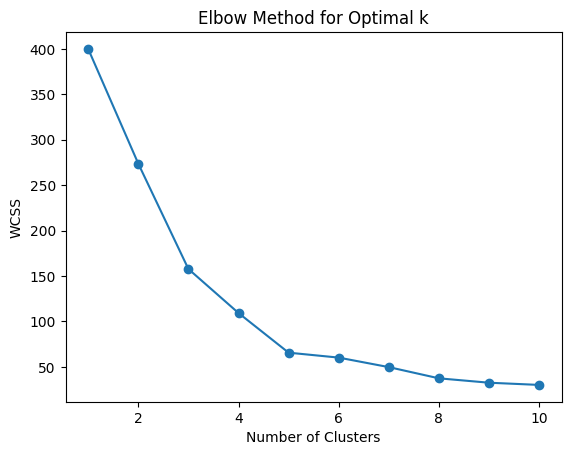

In [11]:
# Step 6: Elbow Method to Find Optimal Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


In [12]:
# Step 7: Apply K-Means Clustering (Assume k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


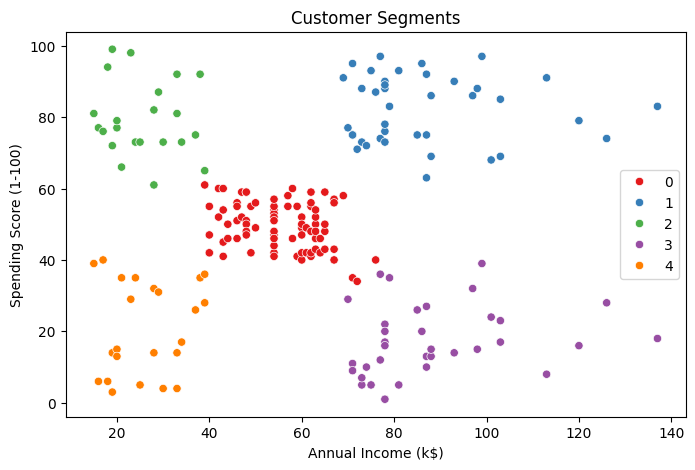

In [13]:
# Step 8: Visualize Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title("Customer Segments")
plt.legend()
plt.show()


In [14]:
# Step 9: Cluster Analysis
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


# DBSCAN


In [15]:
# Step 1: Import required library
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np


In [16]:
# Step 2: Select and scale features again (in case not reused)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
# Step 3: Apply DBSCAN
# eps = distance threshold, min_samples = minimum number of points to form a dense region
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Assign cluster labels to the DataFrame
df['DBSCAN_Cluster'] = clusters


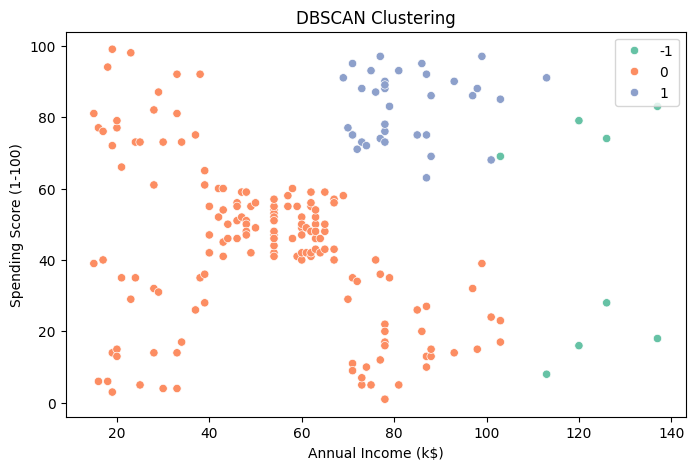

In [18]:
# Step 4: Visualize DBSCAN clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='DBSCAN_Cluster', palette='Set2', data=df)
plt.title("DBSCAN Clustering")
plt.legend()
plt.show()


In [19]:
# Step 5: Check how many clusters were found (excluding noise = -1)
unique_clusters = np.unique(clusters)
print("Clusters found (including noise):", unique_clusters)
print("Number of clusters (excluding noise):", len(unique_clusters[unique_clusters != -1]))


Clusters found (including noise): [-1  0  1]
Number of clusters (excluding noise): 2
